<h1>Contenido<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ESTADÍSTICA-II-PARA-DATA-SCIENCE:-INFERENCIAL" data-toc-modified-id="ESTADÍSTICA-II-PARA-DATA-SCIENCE:-INFERENCIAL-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ESTADÍSTICA II PARA DATA SCIENCE: INFERENCIAL</a></span><ul class="toc-item"><li><span><a href="#PREPARACION" data-toc-modified-id="PREPARACION-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>PREPARACION</a></span></li><li><span><a href="#ESTADÍSTICA-INFERENCIAL" data-toc-modified-id="ESTADÍSTICA-INFERENCIAL-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>ESTADÍSTICA INFERENCIAL</a></span><ul class="toc-item"><li><span><a href="#Distribuciones" data-toc-modified-id="Distribuciones-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Distribuciones</a></span><ul class="toc-item"><li><span><a href="#Distribuciones-discretas" data-toc-modified-id="Distribuciones-discretas-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Distribuciones discretas</a></span></li><li><span><a href="#Distribuciones-continuas" data-toc-modified-id="Distribuciones-continuas-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>Distribuciones continuas</a></span></li></ul></li><li><span><a href="#Teorema-del-Límite-Central" data-toc-modified-id="Teorema-del-Límite-Central-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Teorema del Límite Central</a></span></li><li><span><a href="#Cálculo-de-intervalos-de-confianza" data-toc-modified-id="Cálculo-de-intervalos-de-confianza-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Cálculo de intervalos de confianza</a></span></li><li><span><a href="#Muestreo" data-toc-modified-id="Muestreo-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Muestreo</a></span></li><li><span><a href="#Alpha-y-pvalor" data-toc-modified-id="Alpha-y-pvalor-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Alpha y pvalor</a></span></li><li><span><a href="#Contraste-de-hipótesis" data-toc-modified-id="Contraste-de-hipótesis-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Contraste de hipótesis</a></span></li></ul></li></ul></li></ul></div>

# ESTADÍSTICA II PARA DATA SCIENCE: INFERENCIAL

## PREPARACION

In [2]:
# Carga de paquetes y datos
import pandas as pd
import numpy as np
import statistics
import scipy as sp
import seaborn as sns
import random
import math
from statsmodels.stats.proportion import proportions_ztest

df = sns.load_dataset('tips')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## ESTADÍSTICA INFERENCIAL

La estadística inferencial nos da herramientas para poder estimar **cómo de robustos y representativos del dato "real" en la población son las conclusiones que estamos obteniendo mediante nuestros análisis en la muestra**.

Ya sabemos que la población es el total de elementos sobre el cual estamos intentando obtener conclusiones. Y en la mayoría de los casos será un ideal ya que operativamente no podremos nunca acceder a él.

Por ejemplo si queremos estudiar los hábitos de compra de los españoles nunca podremos hacer una encuesta ni recopilar datos de TODOS los españoles.

O si estamos analizando los clientes de una empresa realmente nunca podremos analizar el total de clientes potenciales a los que esa empresa podría algún día llegar a tener como clientes.

Por ello en la práctica se entiende que siempre estaremos trabajando con una muestra de esa población.

(Tener en cuenta las notas que comentamos al inicio de este módulo sobre el grado en el que podemos considerar como realmente aleatoria una muestra que tenemos en un contexto empresarial)

Sobre esa muestra haremos nuestros análisis y obtendremos unas conclusiones, pero no sabemos hasta qué punto esas conclusiones o datos se acercan al dato "real" que obtendríamos si pudiéramos analizar toda la población.

En la práctica usaremos la **estadística inferencial** sobre todo para:

* Validar que el dato que hemos obtenido en la muestra es, bajo unas condiciones probabilísticas, un dato correcto, robusto y extrapolable
* Conocer los límites o intervalos superior e inferiores al dato que podríamos considerar válidos
* Aceptar o rechazar ciertas conclusiones (hipótesis) que queramos poner a prueba

En términos técnicos los puntos anteriores se cubren mediante lo que se llama:

1. Estimación de intervalos de confianza
2. Contraste de hipótesis

Además por el camino aprenderemos sobre distribuciones de probabilidad, y cómo hacer muestras (algo que aún en tiempos de Big Data sigue siendo de mucha utilidad).


### Distribuciones

Una distribución es una función que muestra los **posibles valores de una variable y como de frecuente o probable es que ocurra cada uno**.

Es un concepto clave para todo lo que vamos ver después, especialmente la distribución que se llama normal o curva de Gauss.

La gran clave conceptual de la utilidad de las distribuciones es que pueden ser definidas por unos parámetros, y por tanto conocidas en todo su recorrido.

Por tanto, si cuando estamos analizando un evento, descubrimos que ese evento parece seguir una distribución conocida, es como tener un mapa, o como conocer las preguntas del examen.

Ya que podremos utilizar ese conocimiento de la distribución para hacer predicciones o contrastar hipótesis.

Por ejemplo se ha visto que lo que se llama "teoría de colas", como el número de llamadas que entran por unidad de tiempo en un call center, suele seguir la distribución de Poisson. Así que si queremos dimensionar adecuadamente un call center podemos usar esta distribución para predecir probabilísticamente el número de llamadas que entrarán y dimensionar en consecuencia.

Podemos hacer una gran clasificación de las distribuciones entre:

* Distribuciones de variables discretas: Bernouilli, Binomial, Poisson
* Distribuciones de variables continuas: Normal, T de Student, distribución F

Las discretas las vamos a repasar brevemente y poner ejemplos gráficos para que te suenen. Y en las contínuas realmente nos vamos a centrar en la distribución Normal que es la más imporante para todo lo que vamos a ver después.

#### Distribuciones discretas

**Bernouilli**

Sigue esta distribución todo experimento aleatorio en que solo pueden ocurrir dos sucesos que además son mutuamente excluyentes.

El ejemplo más clásico es tirar una moneda.

Los eventos no tienen por que ser 50%-50% pueden tener diferentes probabilidades siempre que suemen 100%.

In [4]:
#Ejemplo de una moneda trucada para que el 70% de las veces salga cara
from scipy.stats import bernoulli
moneda = bernoulli.rvs(size=100,p=0.7)
moneda

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

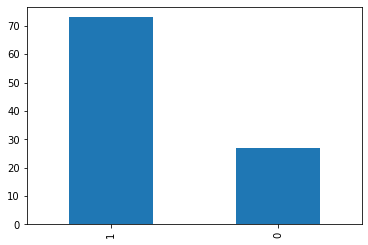

In [5]:
pd.Series(moneda).value_counts().plot(kind = 'bar');

**Binomial**

Sigue esta distribución la suma de los "éxitos" (los unos) que se obtienen en n repeticiones de un experimento de Bernouilli donde la probabilidad (p) de unos se mantiene constante.

Por ejemplo si tiro una moneda (no sesgada) 10 veces, y repito ese experimento 100 veces, ¿en cuantos de esos experimentos obtendré 0 caras, 1 cara, 2 caras, etc.

A medida que n aumenta, y siempre que p no tome valores muy extremos la binomial tiende hacia la normal. Así que en la práctica podremos usar la normal como un proxy en muchas ocasiones.

In [6]:
from scipy.stats import binom
monedas = binom.rvs(n=10,p=0.5,size=100)
monedas

array([5, 9, 3, 5, 3, 6, 4, 5, 5, 5, 7, 4, 2, 6, 5, 4, 4, 5, 6, 4, 5, 5,
       7, 6, 6, 5, 4, 4, 3, 6, 4, 8, 2, 5, 4, 5, 6, 5, 5, 4, 5, 5, 4, 6,
       6, 9, 5, 8, 4, 8, 5, 8, 8, 4, 5, 7, 3, 6, 6, 5, 5, 5, 5, 4, 7, 4,
       3, 5, 3, 5, 4, 5, 3, 9, 6, 4, 7, 5, 7, 4, 3, 5, 6, 6, 8, 3, 2, 4,
       4, 4, 5, 2, 5, 3, 8, 4, 6, 6, 5, 3])

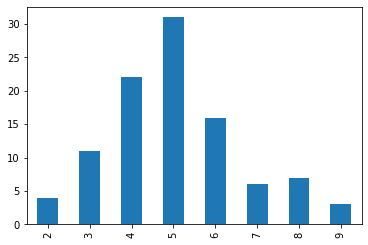

In [7]:
pd.Series(monedas).value_counts().sort_index().plot(kind = 'bar');

**Poisson**

Trata de predecir el número de veces que un evento ocurrirá en un intervalo de tiempo.

Por ejemplo lo que decíamos de teoría de colas en un call center. O el número de pacientes de urgencias que llegarán cada hora.

El parámetro que la define es Lambda: la media del número de eventos por intervalo de tiempo.

Conforme Lambda se aleja de valores muy bajos esta distribución tiende hacia la normal.

También es especialmente útil para "sucesos raros".

Por ejemplo para predecir el número de suicidios diarios en un país, cuantos trillizos nacerán en un día, número de visitantes concurrentes en una web pequeña, etc.

Ejemplo: si lo esperado es que lleguen 2 pacientes cada 15 minutos a urgencias, ¿cual sería la distribución más probable de llegadas?

In [8]:
#El parámetro mu en esta implementación es Lambda
from scipy.stats import poisson
llegadas = poisson.rvs(mu=2,size=10000)
llegadas

array([1, 0, 1, ..., 2, 1, 0])

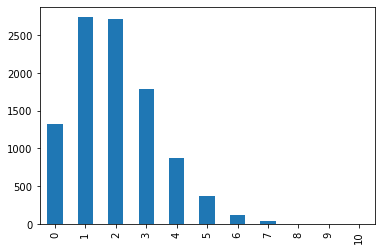

In [9]:
pd.Series(llegadas).value_counts().sort_index().plot(kind = 'bar');

#### Distribuciones continuas

**Distribución normal**

Es la distribución más importante y la más utilizada. También llamada curva o campana de Gauss.

Ya que es la que se produce cuando una variable está compuesta de otras muchas variables.

Y eso es lo más frecuente en casi cualquier ámbito.

Por ejemplo el peso de una persona depende de muchos factores: genética, alimentación, edad, etc. Y se demuestra que se distribuye según una normal.

O la inteligencia que también depende de múltiples factores  genéticos y culturales.

Etc.

Además la mayoría de distribuciones, cuando trabajamos con grandes números como es el caso de data science, convergen hacia la normal.

La normal se define por dos parámetros: la media y la desviación típica.

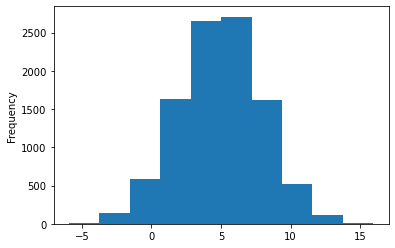

In [10]:
#Ejemplo de una normal
#Loc es la media y scale es la desviación típica
from scipy.stats import norm
normal = norm.rvs(size=10000,loc = 5, scale = 3)
pd.Series(normal).plot(kind = 'hist');

**Otras distribuciones**

Existen otras distribuciones, como la F de Snedecor que se usa para el contraste de igualdad de varianzas, o la T de student que es una normal para cuando tenemos poca muestra o desconocemos la varianza poblacional. 

Esta última tiene más relevancia, ya que la usaremos en ciertos casos del contraste de hipótesis.

Pero quédate simplemente con que es como una normal pero con mayor densidad en las colas.

### Teorema del Límite Central

Es uno de los teoremas más importantes de la estadística, ya que es el que nos va a permitir aplicar con seguridad todo lo que veremos en los apartados siguientes.

Básicamente consiste en que se ha demostrado que si hacemos medias sobre muchas muestras aleatorias de una población, la distribución resultante de todas esas muestras se va a distribuir según una normal, **da igual cual fuera forma de la distribución original en la población**.

El conjunto de esas medias sobre sobre muchas muestras aleatorias de una población es a su vez una distribución, y se llama **distribución muestral**.

Pero además dice que:

1. La media de la distribución muestral tiende a converger a media de la población. Por tanto podemos usar el dato de la distribución muestral como válido en la población
2. La variabilidad de la distribución muestral, que se llama **error típico** (o también lo verás como error estandar), va a ser igual a la desviación típica de la población dividida por la raiz cuadrada del tamaño de la muestra

Osea que si sabemos la media de la distribución muestral estamos muy cerca de la media real de la población.

Pero **en cada una de las muestras** de la distribución muestral (que será lo que manejemos en la realidad, una sola de esas muestras) esa media va tener un valor parecido pero diferente a las demás muestras. Es decir, es un dato que tiene una variabilidad.

Si esa variabilidad (el error típico) es grande significa que esa media que estamos sacando en nuestra muestra puede no ser buena estimación de la media real en la población.

Pero si es pequeña significa que esa estimación sí está más cerca del valor real en la población.

Y como el denominador del error típico incluye el tamaño muestral, pasará que cuanto mayor sea la muestra menor será la variabilidad, es decir, más precisa será la media muestral con respecto a la de la población.

En la práctica, como no tenemos la desviación típica de la población, se sustituye por la desviación típica de la muestra, de forma que usando la fórumula del punto 2) podremos estimar el error típico de la distribución muestral a partir de la desviación típica de la muestra.

Pero aquí hay mucha miga, así que vamos paso a paso.

Vamos a crear una distribución simulando una población con otra forma, por ejemplo una exponencial

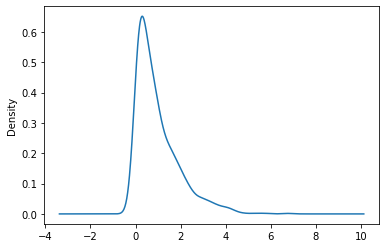

In [11]:
from scipy.stats import expon
poblacion = expon.rvs(loc=0, scale=1,size=1000)
pd.Series(poblacion).plot(kind = 'density');

Ahora sobre la población vamos a extraer 500 muestras aleatorias de tamaño 500 cada una de ellas. Y por tanto tendremos una **distribución muestral**.

In [12]:
random.seed(1234)
muestras = [random.sample(list(poblacion), 500) for i in range(500)]
medias = [np.array(muestra).mean() for muestra in muestras]
#Visualizamos las 10 primeras
medias[0:10]

[0.9997672640116994,
 0.9599506126016479,
 1.0238573887582647,
 0.9932353591815983,
 0.9618175641624933,
 0.909207361056239,
 0.963307051218361,
 0.9777230627175867,
 0.9959170336565685,
 0.9478127244442255]

Calculamos la media en la población y en la distribución muestral para ver que efectivamente tiende a converger.

Y también graficamos la distribución muestral para ver que es una normal.

La media de la población es: 0.970981
Y la media de la distribución muestral es: 0.969980


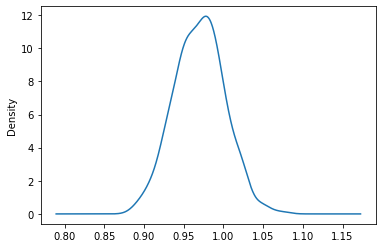

In [13]:
media_poblacion = poblacion.mean()
media_muestras = np.array(medias).mean()

print('La media de la población es: %f'%media_poblacion)
print('Y la media de la distribución muestral es: %f'%media_muestras)

pd.Series(medias).plot(kind = 'density');

Ahora bien, en la práctica no tendremos 500 muestras, si no que tendremos un dataset que podemos entender como una sola de esas muestras, y sobre ese dataset haremos nuestros análisis y calcularemos nuestros datos.

Por tanto no tendremos esos datos de la distribución muestral de las 500, pero podemos volver a usar el teorema del límite central, que nos dice que el error típico de la distribución muestral será igual a la desviación típica encontrada en la muestra dividida por la raiz cuadrada del tamaño de la muestra.

Por ejemplo vamos a coger una de las muestras y calcular el error típico a partir de ella.

In [14]:
muestra = muestras[0]

desv_tip_muestra = np.array(muestra).std()
error_tipico = desv_tip_muestra / math.sqrt(500)

print('El error típico según el teorema del límite central es: %f'%error_tipico)

El error típico según el teorema del límite central es: 0.044921


In [15]:
error_tipico

0.044921344657011766

In [16]:
np.array(muestra).mean()

0.9997672640116994

**EN CONCLUSIÓN**, el teorema del límite central nos va a permitir que cuando en la realidad sólo estemos ante un conjunto de datos que entenderemos como sólo una muestra de todo el espacio muestral disponible podamos:

* Asumir que la media de nuestra muestra converge a la de la distribución muestral y por tanto a la de la población
* Saber que nuestra media realmente es solo una de todas las posibles, y por tanto es un dato que tiene una variación
* Poder calcular esa variación, mediante el error típico

En nuestro ejemplo de arriba, sabemos que el valor de la media en la muestra va a estar en torno al 0.98.

Pero sabemos que ese dato tiene una variación, en concreto en nuestra muestra encontramos que el error típico es 0.04.

Es decir, el dato de la media de 0.98 variará en 0.04 **por cada desviación típica que nos alejemos de la media**

Pero entonces, ¿dónde ponemos los límites para decir si un nivel de variación es ya razonable o no?

Por ejemplo, vamos a recuperar el gráfico de la distribución muestral. 

Y sabemos que el dato real estará en torno a 0.98, aunque no estamos seguros de que sea exactamente 0.98.

Entonces ¿qué consideraríamos exactamente como un dato representativo de nuestra media? ¿La media también podriá ser 0.93, o 1.02, o 2.8?

Justamente resolver esa pregunta es lo que se llama calcular el "Intervalo de Confianza"

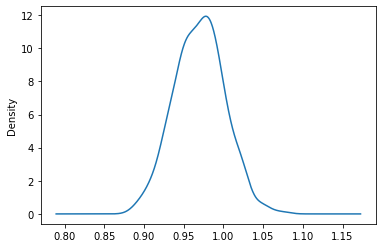

In [17]:
pd.Series(medias).plot(kind = 'density');

### Cálculo de intervalos de confianza

Nos habíamos quedado en que tenemos un dato (la media en nuestra muestra) que se aproxima al dato real en la población, pero que puede no ser exactament el dato real.

Es decir, usando ese dato de la muestra como aproximación estamos cometiendo un error: el **margen de error**.

##### Margen de error

Parte de ese error viene explicado por la variabilidad, a menos variabilidad menos error, y esa variabilidad la calculábamos con el error típico.

Pero habíamos visto que el error típico es la desviación típica de la distribución muestral. 

Es decir, que si nos alejamos una desviación típica de la media el error que podemos estar cometiendo era en nuestros datos de 0.04. (Esto habría que hacerlo tanto por la derecha como por la izquierda).

Pero entonces si nos alejamos 2 desviaciones típicas estaríamos cometiendo un posible error de 0.08.

Es decir, que otra parte del error viene dado por cuanto queramos nosotros alajarnos de la media.

En definitiva el **margen de error será igual al error típico multiplicado por el número de desviaciones típicas que queramos alejarnos**.

U operativamente, a partir de lo que tenemos disponible en una muestra:

margen de error = error típico * número desviaciones típicas

Si lo descomponemos tenemos que:

El margen de error depende de:

* la variabilidad de lo que estemos midiendo: esto no lo podemos controlar
* el tamaño muestral: a mayor tamaño menor error
* el número de desviaciones típicas que queramos alejarnos, que lo definimos nosotros en función del nivel de confianza que queramos aplicar

##### Niveles de confianza

Pero si el número de desviaciones típicas que nos queremos alejar lo decidimos nosotros ... ¿En qué nos podemos basar para decidirlo?.

Aquí entra el concepto de **niveles de confianza**.

Imagínate que pienso un número del 1 al 10 y tienes que adivinarlo.

Para ello te dejo que digas un intervalo de números.

Por ejemplo, si te dejara un intervalo de 5 números, ¿cómo de confiado estarías en acertar?. Pues un 50% no?

Y si te dejara un intervalo de 9 números, ¿cómo de confiado estarías en acertar?. Pues un 90%

Ahora bien, en el caso de que mi número estuviera en tu intervalo. ¿Qué error medio estarías cometiendo si hiciéramos el experimento infinitas veces?

* En el caso del intervalo de cinco números estarías cometiendo un error medio de 2.5
* En el caso del intervalo de nueve números estarías cometiendo un error medio de 4.5

Por tanto **cuanto mayor sea el intervalo más seguro vas a estar de que mi número va estar en ese intervalo, pero mayor va a ser también el error medio que estás cometiendo** y por tanto de menor valor será tu dato.

Pues eso es exactamente lo que pasa con los niveles de confianza.

Y dado que es sobre una distribución normal y por tanto conocida, podemos cuantificarlo en términos de probabilidad.

Por ejemplo sabemos que una normal el 68% de los datos están entre la media y una desviación típica por abajo y otra por arriba.

Por tanto podemos darle la vuelta y decir: si quiero trabajar con una confianza del 68% entonces tengo que marcar un intervalo entre la media +- una desviación típica.

Y así se suele hacer. Primero marcas el nivel de confianza al que quieres trabajar y después calculas cuantas desviaciones típicas supone.

Se suelen usar los siguientes estándares:

* 95.5% de nivel de confianza que equivale a 2 desviaciones típicas 
* 99.7% de nivel de confianza que equivale a 3 desviaciones típicas 

Calculemos los datos en nuestro ejemplo y vamos a ver que, al igual que el ejemplo de adivinar el número, si incrementamos la confianza también incrementamos el error.

In [18]:
error_tipico

0.044921344657011766

In [19]:
#Error muestral con nuestros datos para un nivel de confianza del 95,5%
error_95 = 2 * error_tipico
print(error_95)

#Error muestral con nuestros datos para un nivel de confianza del 99,7%
error_99 = 3 * error_tipico
print(error_99)

0.08984268931402353
0.1347640339710353


##### Distribución normal tipificada

En el punto anterior decíamos que vamos a usar el número de desviaciones típicas que un dato se aleja de la media para cuantificar el nivel de confianza al que estamos trabajando.

Pero sabemos que varias distribuciones, aunque todas sean normales, van a tener distintas medias y distintas desviaciones típicas.

Por ello se suele aplicar una operación que se llama tipificar, y que usaremos también en machine learning, para poder trabajar con un estandar. De hecho a las puntuaciones típicas también se les llama puntuaciones estandar.

La fórmula consiste en tomar cada dato de la distribución, restarle la media, y dividir el resultado por la desviación típica.

El resultado es una métrica que se llama puntuaciones z, o típicas o estandar, y que va a tener una distribución con media cero y desviación típica 1.

Vamos a ver un ejemplo donde primero vamos a generar una distribución normal llamada sin_tipificar, con media 86 y desviacion típica 14.

Y después vamos a tipificarla.

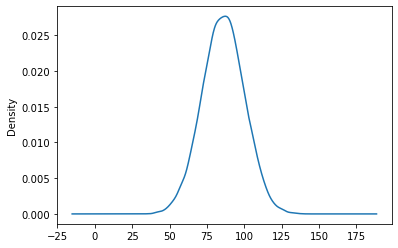

In [20]:
from scipy.stats import norm
sin_tipificar = norm.rvs(size=10000,loc = 86, scale = 14)
pd.Series(sin_tipificar).plot(kind = 'density');

In [21]:
#Vamos a calcular sus estadísticos
media_sin = sin_tipificar.mean()
desv_tip_sin = np.array(sin_tipificar).std()
print('Media: %.2f'%media_sin)
print('Desv Tip: %.2f'%desv_tip_sin)

Media: 85.90
Desv Tip: 14.06


Media: 0.00
Desv Tip: 1.00


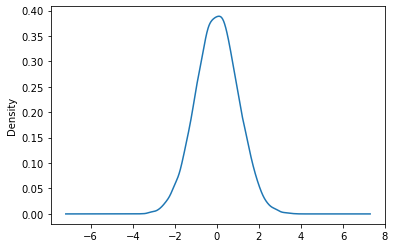

In [22]:
#Ahora vamos a tipificarla y ver que aunque cambien los estadísticos la distribución es igual
tipificada = np.array([(dato - media_sin) / desv_tip_sin for dato in sin_tipificar])

pd.Series(tipificada).plot(kind = 'density');

media_tip = tipificada.mean()
desv_tip_tip = np.array(tipificada).std()
print('Media: %.2f'%media_tip)
print('Desv Tip: %.2f'%desv_tip_tip)

##### Intervalos de confianza

Ahora que ya sabemos estimar el margen de error, calcular el intervalo de confianza es muy sencillo.

El límite inferior vendrá dado por la media menos el margen de error.

Y el límite superior vendrá dado por la media más el margen de error.

Por tanto el intervalo entre el que estará el dato real, al nivel de confianza elegido vendrá dado por:

[media - margen de error, media + margen de error]

In [23]:
#Intervalo de confianza en nuestro ejemplo a un NC del 95,5%
media_muestra = np.mean(muestra)

ic_95 = [media_muestra - error_95, media_muestra + error_95]
print(ic_95)

#Intervalo de confianza en nuestro ejemplo a un NC del 99,7%
ic_99 = [media_muestra - error_99, media_muestra + error_99]
print(ic_99)

[0.9099245746976758, 1.0896099533257229]
[0.865003230040664, 1.1345312979827347]


A la hora de intrepretarlo podríamos leerlo así:

* Estamos un 95% seguros de que la media real va a estar entre 0.88 y 1.05
* Estamos un 99% seguros de que la media real va a estar entre 0.84 y 1.09

Aunque técnicamente sería más correcto leerlo así:

* Si repitiéramos 100 veces el experimento, en 95 de ellas nos saldría un dato entre 0.88 y 1.05
* Si repitiéramos 100 veces el experimento, en 99 de ellas nos saldría un dato entre 0.84 y 1.09

##### Intervalos de confianza en proporciones

Hemos visto como calcular los intervalos de confianza cuando estamos estimando medias.

Pero el otro gran estadístico que podemos estar usando son las proporciones.

Por ejemplo si una landing ha convertido en un piloto al 13% podemos querer estimar sus intervalos.

Conceptualmente todo es igual, pero cambia una cosa: la fórmula para calcular el error típico.

El error típico para distribuciones muestrales de proporciones se calcular como:

Raiz cuadrada de ((p * q) dividido por n), siendo:

p = la proporción obtenida

q = 1-p

n = tamaño de la muestra

Por ejemplo en el caso anterior habíamos obtenido la proporción de conversión del 0.13 en una muestra de 500 visitantes a la web.

Vamos a calcular su intervalo de confianza con un 95,5% de nivel de confianza.

In [24]:
error_tipico_prop = math.sqrt((0.13 * 0.87)/500)
print(error_tipico_prop)

0.015039946808416579


In [27]:
error_tipico_prop_95 = error_tipico_prop * 2 
ic_prop_95 = [0.13 - error_tipico_prop_95, 0.13 + error_tipico_prop_95]
ic_prop_95

[0.09992010638316684, 0.16007989361683317]

Es decir, podríamos esperar que si nada cambia esa landing estuviera convirtiendo entre el 9.9% y el 16% cada día (siempre que hubiera muestra suficiente)

**¿Para qué nos sirve esto en data science?**

En data science raras veces estaremos haciendo estimación de intervalos como tal, pero sí es algo muy frecuente en ciertas técnicas como por ejemplo el forecast, donde además de obtener la salida de la predicción del modelo podemos pedir al software que saque los intervalos de confianza de esa predicción.

Es decir, en vez de estimar que el mes que viene venderemos 180.000€ es más seguro estimar que venderemos entre 172.000€ y 188.000€.

Además cuando los intervalos son muy amplios sabemos que hay mucho margen en la predicción y por tanto hay que tratarla con precaución.

También es muy usado en casos como la planificación de la demanda, donde siempre deberemos trabajar con un "colchón de seguridad" para no quedarnos sin stock, y los intervalos nos ayudan a calcular ese colchón.

Y también es usado para calcular el tamaño correcto que debería tener una muestra para poder trabajar a unos niveles de confianza y de error determinados.

Por la importancia del muestreo vamos a verlo en su propio apartado.

### Muestreo

Aún en tiempos de Big Data el muestreo sigue siendo muy útil en data science.

Aunque la capacidad de computación sea cada vez mayor, la cantidad de datos y de análisis y modelos que hay que hacer en contextos empresariales tampoco para de crecer.

El muestreo ha demostrado su efectividad para el tipo de análisis que hacemos en data science. Siendo que los modelos construídos sobre una muestra bien realizada son igual de válidos y potentes que los realizados sobre toda la población.

Por lo que, aunque tuviéramos la fuerza bruta necesaria para procesar miles de veces toda la información no tiene ningún sentido hacerlo. Y casi siempre se trabaja con muestras para el desarrollo, que después ya se implantará sobre toda la población.

Es cierto que precisamente debido a la abundancia de datos muchas veces el muestreo se hace "a ojo" sabiendo que vas a cumplir los grandes números suficientes para que, siempre que sea aleatorio, sea correcto.

Pero aquí te voy a enseñarlo a hacerlo correctamente, que siempre es lo ideal.

De todas formas, insisto, lo más importante siempre es que para que funcione la muestra tiene que ser aleatoria.

##### Fórmula para calcular el tamaño de la muestra

Cuando vimos el error muestral ya teníamos el tamaño de la muestra incluído en esa ecuación. Recordamos:

margen de error = (desviación típica de la muestra / raiz del tamaño muestral) * número desviaciones típicas

Por tanto sólo necesitamos despejar el tamaño muestral en esa ecuación. Con un añadido, y es que lógicamente antes de hacer la muestra no conocemos su desviación típica, así que se cambia esa variable por la situación de variaza máxima, que en estadística se obtiene como p * q, es decir 0.5 * 0.5.

Hay que aclarar que de nuevo existen muchas fórmulas dependiendo de la situación. Pero en data science casi siempre trabajaremos con poblaciones infinitas (>100.000).

Por tanto la fórmula final para calcular el tamaño muestral es:

In [ ]:
#muestra = ((z**2) * (50*50)) / (me ** 2)

Es decir, que el tamaño de la muestra va a depender de:

* El nivel de confianza al que queramos trabajar: que determinará el z
* El error muestral máximo que queramos cometer

Si queremos trabajar a más NC o cometer menor error deberemos incrementar la muestra.

Por ejemplo:

Calcula el tamaño de muestra necesario si queremos hacer un análisis donde como mucho nos podamos desviar un 3% y con la certeza de que de 100 veces que lo hiciéramos en 95 nos saldrían conclusiones similares

In [1]:
# Vamos a crear una función que calcule el tamaño muestral en base a un NC (pasado como zetas)
# y un margen error (pasado en porcentaje)
def tamaño(z, me):
    tamaño = ((z**2) * (50*50)) / (me ** 2)
    return (tamaño)


# Calculamos
tamaño(1.96, 3)

1067.111111111111

### Alpha y pvalor

Cuando ya estemos en la práctica estaremos frecuentemente usando dos conceptos: alpha y pvalor.

Por ejemplo siempre que hagamos modelos que vienen de la estadística como las regresiones estaremos usando estos conceptos para ver si los coeficientes son significativos, etc.

Pues con lo que ya has aprendido, no sólo vas a saber usarlos, si no que vas a entender el por qué :-)

**Alpha no es más que 1-NC. Es decir, si trabajamos a un NC del 95% entonces Alpha es 5%. Aunque normalmente nos vendrá en tanto por uno, es decir 0.05**.

Por otro lado está el pvalor, también llamado la significación estadística, porque ayuda a diferenciar si un resultado obtenido es estadísticamente significativo o es simplemente fruto del azar.

El **Pvalor es la probabilidad de obtener un valor tan extremo o más que el obtenido en la muestra asumiendo que la hipótesis nula es cierta**. (Más sobre la hipótesis nula en los siguientes apartados)

Entonces si esa probabilidad que nos da el pvalor es tan baja que nos parece "rarísimo" que haya pasado lo que hacemos es pensar que quizá la hipótesis nula no esa cierta.

Es decir, pongamos que aceptamos que el valor real de la media en la población es 100 (hipótesis nula).

Pero en nuestra muestra la media es 108 con un pvalor de 0.02. Ello significa que, si efectivamente la media real fuera 100, la probabilidad de que a nosotros nos saliera 108 o más es sólo del 2%.

Esto es super potente porque con él podemos hacer el proceso al revés. Es decir, podemos saber el límite de nivel de confianza que podríamos elegir para considerar el valor como significativo.

En nuestro ejemplo si hemos obtenido un pvalor de 0.02 con el dato de 108 en la muestra, podremos aceptar que el valor en la población es 100 solo a un 98% de NC pero no a un 99% de NC.

Por tanto, si nosotros definimos el mínimo NC que consideramos aceptable sólo tenemos que contrastar el pvalor contra el Alpha y ver directamente si es significativo a ese nivel o no.

En nuestro ejemplo, si trabajamos a NC = 99% y por tanto Alpha = 0.01, no se cumple que Pvalor < Alpha y por tanto no podemos rechazar la hipótesis de que la media sea 100 al 99% de NC.

Sin embargo sí la rechazaríamos al un 95% NC.

Es decir, operativamente **se interpreta como que si el pvalor es menor al Alpha entonces tenemos que rechazar la hipótesis nula**.

Ya estaremos entrando en el contraste de hipótesis. Y vamos a explicar más lo que es la hipótesis nula y la alternativa.

### Contraste de hipótesis

##### Hipótesis nula e hipótesis alternativa

Prácticamente cualquier inferencia que queramos hacer podemos plantearla como el contraste de una hipótesis.

En el ejemplo que estábamos haciendo hasta ahora la hipótesis sería si el valor de la media en la población podría ser de 100 o no.

Vemos que realmente no es una hipótesis, si no dos. Lo que se llaman:

* Hipótesis nula
* Hipótesis alternativa

La **hipótesis nula** en la mayoría de pruebas estadísticas suele ser que no hay "efecto".

Por ejemplo si estamos comparando la efectividad de dos medicamentos, que no haya efecto aquí significa que ambos medicamentos van a tener resultados similares.

O si estamos contratando un coeficiente de una variable de un modelo, que no haya efecto significa que ese coeficiente podría ser cero, y por tanto esa variable no sería predictiva.

Normalmente la hipótesis nula es lo que nos gustaría "rechazar".

Por el contrario, la **hipótesis alternativa** es que sí existe efecto, y normalmente es lo que buscamos.

Por ejemplo en el caso de los medicamentos nos gustaría que sí hubiera diferencias. Por tanto:

* La hipótesis nula será que el resultado provocado por los medicamentos es similar
* La hipótesis alternativa será que el resultado provocado por los medicamentos es significativamente diferente

##### Pruebas de contraste de hipótesis

Generalizando todo lo que hemos visto hasta ahora tenemos que:

1. Tenemos una distribución conocida, la normal, bien porque la variable original ya era normal o bien por lo que nos dice el teorema del límite central
2. Tenemos una hipótesis nula que queremos contrastar
3. Elegimos un Nivel de Confianza al cual queremos trabajar, que nos da un Alpha
4. Según la prueba que estemos haciendo usaremos un estadístico u otro, que nos devolverá un Pvalor
5. Si el Pvalor es menor que el Alpha entonces rechazamos la hipótesis nula, y por tanto aceptamos la alternativa

En cuanto al estadístico del punto 4 es la parte más compleja, por lo que a nivel práctico y por simplificar, vamos a recoger los 4 principales escenarios que se nos van a presentar y el estadístico que debemos usar en cada caso:

1. Contraste de medias en la población: es decir si la media obtenida puede ser compatible con una media hipotética de la población. Usaremos el estadístico t
2. Contraste de medias entre dos muestras: es decir si la diferencia entre las media de grupos diferentes es significativa o no. Usaremos el estadístico t
3. Contraste de proporciones en la población: es decir si la proporción obtenida puede ser compatible con una porporción hipotética en la población. Usaremos el estadístico z
4. Contraste de proporciones entre dos muestras: es decir si la diferencia entre la proporción de grupos diferentes es significativa o no. Usaremos el estadístico z

###### Contraste de medias en la población

Queremos ver si el valor de la media obtenido en la muestra puede ser compatible con un hipotético valor en la población.

Para ello seguiremos la metodología explicada, usando como estadístico de contraste la prueba t.

Usaremos la implementación de Scipy con la función ttest_1samp() ya que estamos usando el estadístico t en una sola muestra (no comparamos entre dos muestras)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

A esta función tenemos que pasarle:

* a: los datos
* popmean: el valor de h0 a contrastar

Como ejemplo vamos a calcular si es posible que la media de total_bill en la población sea de 25$.

In [4]:
# Primero recordamos cual era el valor en nuestra muestra
df.total_bill.mean()

19.78594262295082

In [5]:
# Paso 1: definimos las hipótesis
h0 = 25
# Por tanto h1 es que sea diferente de 25

In [6]:
# Paso 2: elegimos un nivel de confianza que nos da un alpha.
# Elegimos NC = 95%
alpha = 0.05

In [7]:
# Paso 3: calculamos el pvalor según el estadístico de contraste elegido (t sobre una muestra)
p_valor = sp.stats.ttest_1samp(a=df.total_bill, popmean=h0)[1]
print(f"{p_valor:.3f}")  # Esto es para que no salga con notación científica

0.000


Por tanto vemos que el pvalor es menor que alpha, por tanto no podemos aceptar la H0 y por tanto no es probable que la media de propinas en la población sea de 25$.

Vamos a repetir el ejemplo, pero ahora con un valor quizá más probable. Testemos si la media de propinas podría ser de 20$.

In [8]:
# Paso 1: definimos las hipótesis
h0 = 20
# Por tanto h1 es que sea diferente de 20

In [9]:
# Paso 2: elegimos un nivel de confianza que nos da un alpha.
# Elegimos NC = 95%
alpha = 0.05

In [10]:
# Paso 3: calculamos el pvalor según el estadístico de contraste elegido (t sobre una muestra)
# como la h0 es una igualdad dejamos el alternative por defecto
p_valor = sp.stats.ttest_1samp(a=df.total_bill, popmean=h0)[1]
print(f"{p_valor:.3f}")  # Esto es para que no salga con notación científica

0.708


Ahora pvalor es mayor que alpha, luego no podemos rechazar H0, luego 20$ sí es un valor posible en la población a tenor de los datos de nuestra muestra.

###### Contraste de medias entre dos muestras

En este caso lo que queremos ver es si la diferencia obtenida entre 2 medias de dos grupos distintos es o no significativa.

Para ello seguiremos la metodología explicada, usando como estadístico de contraste la prueba t.

Usaremos la implementación de Scipy con la función ttest_ind() ya que estamos usando el estadístico t en dos muestras que son independientes (porque pertenecen a dos poblaciones distintas).

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

A esta función tenemos que pasarle:

* a y b: los datos en forma de arrays numpy
* equal_var: ponerlo a False porque si no asume que ambas poblaciones tienen la misma varianza

Como ejemplo vamos a calcular si hay diferencias significativas entre las propinas que dejan las mujeres y los hombres.

In [11]:
# Primero recordamos cual era el valor en nuestra muestra
df.groupby('sex').total_bill.mean()

C:\Users\Halleluya\AppData\Local\Temp\ipykernel_1712\1178644779.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex').total_bill.mean()


sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [12]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
# Tenemos que crear dos vectores, uno con los hombres y otro con la mujeres
hombres = df.loc[df.sex == 'Male', 'total_bill']
mujeres = df.loc[df.sex == 'Female', 'total_bill']

In [ ]:
#Paso 1: definimos las hipótesis
#H0: los hombres y las mujeres dejan la misma propina
#H1: los hombres y las mujeres no dejan la misma propina

In [15]:
# Paso 2: elegimos un nivel de confianza que nos da un alpha.
# Elegimos NC = 95%
alpha = 0.05

In [16]:
# Paso 3: calculamos el pvalor según el estadístico de contraste elegido (t sobre dos muestras independientes)
p_valor = sp.stats.ttest_ind(a=hombres, b=mujeres, equal_var=False)[1]
print(f"{p_valor:.3f}")  # Esto es para que no salga con notación científica

0.019


Por tanto vemos que el pvalor es menor que alpha, por tanto no podemos aceptar la H0 y por tanto no es probable que la media de propinas en los hombres sea la misma que en las mujeres.

Rechazamos h0 y concluímos que las diferencias sí son significativas al 95% de confianza.

Pero vamos a ver si también lo son al 99% de confianza.

In [17]:
# Paso 1: definimos las hipótesis
# H0: los hombres y las mujeres dejan la misma propina
# H1: los hombres y las mujeres no dejan la misma propina

In [18]:
# Paso 2: elegimos un nivel de confianza que nos da un alpha.
# Elegimos NC = 99%
alpha = 0.01

In [19]:
# Paso 3: calculamos el pvalor según el estadístico de contraste elegido (t sobre dos muestras independientes)
p_valor = sp.stats.ttest_ind(a=hombres, b=mujeres, equal_var=False)[1]
print(f"{p_valor:.3f}")  # Esto es para que no salga con notación científica

0.019


Ahora pvalor es mayor que alpha, luego no podemos rechazar H0, luego no podríamos afirmar con un 99% de confianza que los hombre dejen diferente propina que las mujeres.

###### Contraste de proporciones en la población

Queremos ver si una proporción obtenida en la muestra puede ser compatible con un hipotético valor en la población.

Para ello seguiremos la metodología explicada, usando como estadístico de contraste la prueba z.

Scipy no tiene implementación (hasta donde yo sé) para hacer contrastes de proporciones, así que vamos a usar la implementación del paquete statsmodels, con la función proportions_ztest() ya que estamos usando el estadístico z, y como es en una sola muestra a los parámetros count y nobs solo les pasaremos un dato a cada uno.

https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html

A esta función tenemos que pasarle:

* count: los éxitos (lo que queremos medir)
* nobs: el tamaño de la muestra
* value: el valor de la hipótesis nula a testar

Como estamos haciendo el contraste contra un dato de la población sólo le pasaremos un valor en count y en nobs, y le pasaremos el value.

Si hiciéramos contraste entre 2 muestras (como en el siguiente ejemplo) entonces tendríamos que pasarle un array con dos números a count y a nobs, y no usaríamos el value.

Como ejemplo vamos a calcular si es posible que el porcentaje de fumadores en la población sea del 40%.

In [3]:
# Primero recordamos cual era el valor en nuestra muestra (en porcentaje)
df.smoker.value_counts(normalize=True)

smoker
No     0.618852
Yes    0.381148
Name: proportion, dtype: float64

In [4]:
# Primero recordamos cual era el valor en nuestra muestra (en absoluto)
df.smoker.value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [5]:
# Paso 1: definimos las hipótesis
h0 = 0.4
# Por tanto h1 es que sea diferente del 40%

In [6]:
# Paso 2: elegimos un nivel de confianza que nos da un alpha.
# Elegimos NC = 95%
alpha = 0.05

In [7]:
# Paso 3: calculamos el pvalor según el estadístico de contraste elegido (z sobre una muestra)
exitos = 93  # fijarse que aquí tenemos que poner los fumadores que son los que nos interesan
muestra = 151 + 93
p_valor = proportions_ztest(count=exitos, nobs=muestra, value=h0)[1]
print(f"{p_valor:.3f}")  # Esto es para que no salga con notación científica

0.544


Por tanto vemos que el pvalor NO es menor que alpha, por tanto no podemos rechazar la H0 y por tanto sí puede ser que en esta población el 40% de las personas sean fumadoras (al 95% de confianza)

###### Contraste de proporciones entre dos muestras

Queremos ver si una diferencia en la proporción obtenida entre dos muestras puede ser estadísticamente significativa.

Para ello seguiremos la metodología explicada, usando como estadístico de contraste la prueba z.

Scipy no tiene implementación (hasta donde yo sé) para hacer contrastes de proporciones, así que vamos a usar la implementación del paquete statsmodels, con la función proportions_ztest() ya que estamos usando el estadístico z, y como son dos muestras, a los parámetros count y nobs les tendremos que pasar un array.

https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html

A esta función tenemos que pasarle:

* count: los éxitos (lo que queremos medir)
* nobs: el tamaño de la muestra
* value: el valor de la hipótesis nula a testar

Como estamos haciendo el contraste de dos muestras le pasaremos un array con dos números a count y a nobs, y no usaremos el value.

Como ejemplo vamos a calcular si la diferencia entre el porcentaje de fumadores entre hombres y mujeres puede ser significativa.

In [8]:
# Primero recordamos cual era el valor en nuestra muestra (en porcentaje)
pd.crosstab(df.sex, df.smoker, normalize='columns')

smoker,Yes,No
sex,,
Male,0.645161,0.642384
Female,0.354839,0.357616


In [9]:
# Primero recordamos cual era el valor en nuestra muestra (en absoluto)
pd.crosstab(df.sex, df.smoker)

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [ ]:
#Paso 1: definimos las hipótesis
#h0: el porcentaje de fumadores en hombres es igual que en mujeres
#h1: el porcentaje de fumadores en hombres NO es igual que en mujeres

In [10]:
# Paso 2: elegimos un nivel de confianza que nos da un alpha.
# Elegimos NC = 95%
alpha = 0.05

In [12]:
# Paso 3: calculamos el pvalor según el estadístico de contraste elegido (z sobre dos muestras)
exitos_h = 60
exitos_m = 33
muestra_h = 60 + 97
muestra_m = 33 + 54

# lo pasamos a array porque así lo pide la función
array_exitos = np.array([exitos_h, exitos_m])
array_muestras = np.array([muestra_h, muestra_m])

p_valor = proportions_ztest(count=array_exitos, nobs=array_muestras)[1]
print(f"{p_valor:.3f}")  # Esto es para que no salga con notación científica

0.965


Por tanto vemos que el pvalor NO es menor que alpha, por tanto no podemos rechazar la H0 y por tanto al 95% de confianza no podemos decir que los hombres y las mujeres fumen en distinto porcentaje.

**¿Para qué nos sirve esto en data science?**

Como ya hemos comentado en la mayoría de los casos, a nivel práctico, cuando queramos comprobar si el valor de un estadístico que hemos calculado (correlación, chi-cuadrado, coeficientes de modelos, ...) es significativo a nivel poblacional, la prueba ya nos devolverá el pvalor, por lo que solo tendremos que compararlo contra un Alpha, que normalmente será 0.05. 

Si Pvalor < Alpha entonces el valor SI es significativo.

Pero más allá de que sea prácticamente muy sencillo, es conveninete que sepas de donde viene para entenderlo, aplicarlo e interpretarlo correctamente.

**Ejemplo práctico**

Para terminar de afianzar los conceptos vamos a hacer un ejemplo práctico sobre uno de los casos de contraste de hipótesis que posiblemente tengas más oportunidad de realizar. Los test A/B.

En general hacer test A/B es configurar un experimento donde queremos comprobar si hay diferncias significativas entre algo nuevo que queremos probar (grupo tratamiento) y lo que ya estaba funcionando (grupo de control).

Es muy común actualmente por ejemplo en marketing digital, donde podemos tener una versión de una web y queremos comprobar si ciertos cambios hacen o no que suba la conversión.

Lo mismo puede ser aplicado a emails, páginas de venta, etc.

En este caso vamos a suponer que tenemos la web actual que llamaremos A. Y una variación que llamaremos B.

Y vamos a asignar aleatoriamente la A a 1000 de los próximos visitantes y la B a otros 1000 también aleatorios.

Vamos a suponer que es una web para registrarse y que 285 personas se registraron en la A y 321 en la B.

Por tanto la conversión es:

- Conversión A: 28.5%
- Conversión B: 32.1%

¿Esa diferencia es estadísticamente significativa y por tanto podemos cambiar la web con garantías?

¿O quizá esa diferencia puede ser explicada simplemente por el azar muestral y por tanto no deberíamos cambiarla todavía?

La hipótesis nula por tanto es que las 2 webs convierten igual, y la alternativa que no convierten igual.

Y vamos a trabajar a un 95% de confianza, por tanto alpha = 0.05.

Ya sabemos que al ser un contraste de proporciones podemos usar el test z.


In [13]:
# Vamos a usar la implementación del test z para proporciones de statsmodels

conversiones = np.array([285, 321])
muestras = np.array([1000, 1000])

pval = proportions_ztest(conversiones, muestras)[1]

print('pvalor igual a: %.3f' % pval)

pvalor igual a: 0.080


Como el pvalor no es menor que 0.05 entonces no podemos rechazar la hipótesis nula.

Es decir, no tenemos pruebas suficientemente sólidas para poder decir que la B convierte mejor, y por tanto la decisión será que por ahora no vamos a cambiar la web.